In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Fuzzy 1 - Compra/Venda de uma *stock*
1. **INPUTS**
    1. Porcentagem de crescimento
        * Universo: Quanto variou o preço da *stock* desde o último pico?
        * Conjunto Fuzzy: baixo, médio, alto
    2. Risco
        * Universo: Qual o risco de se investir nessa *stock* ?
        * Conjunto Fuzzy: baixo, médio, alto
2. **OUTPUTS**
    1. Porcentagem de compra/venda
        * Universo: Qual a porcentagem do *budget* que deve ser gasta com essa ação?
        * Conjunto Fuzzy: muito baixo, baixo, médio, alto e muito alto
3. **RULES**
    * Se a *stock* tem *alto crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *muito alto*
    * Se a *stock* tem *alto crescimento* e *médio risco* **ENTÃO** o investimento deve ser *alto*
    * Se a *stock* tem *alto crescimento* e *alto risco* **ENTÃO** o investimento deve ser *baixo*

    * Se a *stock* tem *médio crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *alto*
    * Se a *stock* tem *médio crescimento* e *médio risco* **ENTÃO** o investimento deve ser *médio*
    * Se a *stock* tem *médio crescimento* e *alto risco* **ENTÃO** o investimento deve ser *baixo*
    
    * Se a *stock* tem *baixo crescimento* e *baixo risco* **ENTÃO** o investimento deve ser *baixo*
    * Se a *stock* tem *baixo crescimento* e *médio risco* **ENTÃO** o investimento deve ser *muito baixo*
    * Se a *stock* tem *baixo crescimento* e *alto risco* **ENTÃO** o investimento deve ser *muito baixo*

#### Input1: variacao com relação ao ultimo pico

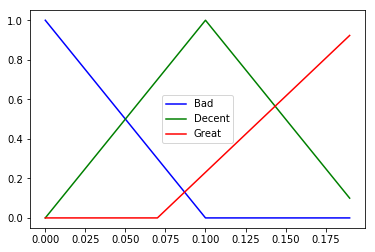

In [3]:
x_filter = np.arange(0, 0.2, 0.01)

x_lo = fuzz.trimf(x_filter, [0, 0, 0.1])
x_md = fuzz.trimf(x_filter, [0, 0.1, 0.2])
x_hi = fuzz.trimf(x_filter, [0.07, 0.2, 0.2])

plt.plot(x_filter, x_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_filter, x_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_filter, x_hi, 'r', linewidth=1.5, label='Great')
plt.legend()
plt.show()

#### Input2: risco da stock

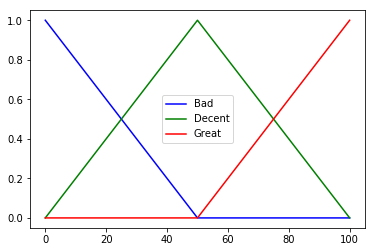

In [4]:
x_risk = np.arange(0, 101, 1)

risk_lo = fuzz.trimf(x_risk, [0, 0, 50])
risk_md = fuzz.trimf(x_risk, [0, 50, 100])
risk_hi = fuzz.trimf(x_risk, [50, 100, 100])

plt.plot(x_risk, risk_lo, 'b', linewidth=1.5, label='Bad')
plt.plot(x_risk, risk_md, 'g', linewidth=1.5, label='Decent')
plt.plot(x_risk, risk_hi, 'r', linewidth=1.5, label='Great')
plt.legend()
plt.show()

#### Output: pct de compra/venda

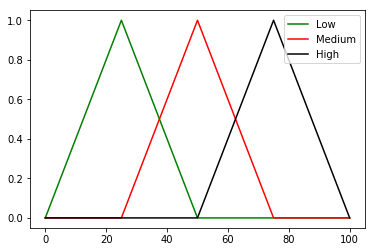

In [76]:
x_pct = np.arange(0, 101, 1)

pct_lo = fuzz.trimf(x_pct, [0, 25, 50])
pct_md = fuzz.trimf(x_pct, [25, 50, 75])
pct_hi = fuzz.trimf(x_pct, [50, 75, 100])

plt.plot(x_pct, pct_lo, 'green', linewidth=1.5, label='Low')
plt.plot(x_pct, pct_md, 'red', linewidth=1.5, label='Medium')
plt.plot(x_pct, pct_hi, 'black', linewidth=1.5, label='High')

plt.legend()
plt.show()

#### Ativa as funcoes fuzzy no valor do input

In [77]:
x_level_lo = fuzz.interp_membership(x_filter, x_lo, 0.1)
x_level_md = fuzz.interp_membership(x_filter, x_md, 0.1)
x_level_hi = fuzz.interp_membership(x_filter, x_hi, 0.1)

risk_level_lo = fuzz.interp_membership(x_risk, risk_lo, 80.5)
risk_level_md = fuzz.interp_membership(x_risk, risk_md, 80.5)
risk_level_hi = fuzz.interp_membership(x_risk, risk_hi, 80.5)

#### REGRAS

In [78]:
# Rule 1 --> high x_filter AND low_risk
# The OR operator means we take the maximum of these two.
rule1 = np.fmin(x_level_hi, risk_level_lo)
activation_hi = np.fmin(rule1, pct_hi)

# Rule 2 --> low x_filter OR high_risk
rule2 = np.fmax(x_level_lo, risk_level_hi)
activation_lo = np.fmin(rule2, pct_lo)

# Rule 3 --> medium x_filter
activation_md = np.fmin(x_level_md, pct_md)

# # Rule 4 --> high risk
# activation_lo = np.fmin(risk_level_hi, pct_lo)

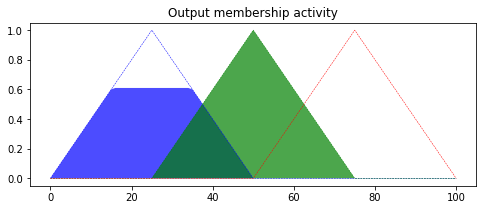

In [79]:
# visualizacao
pct0 = np.zeros_like(x_pct)

fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_pct, pct0, activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_pct, pct_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_pct, pct0, activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_pct, pct_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_pct, pct0, activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_pct, pct_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
plt.show()

#### Defuzzification

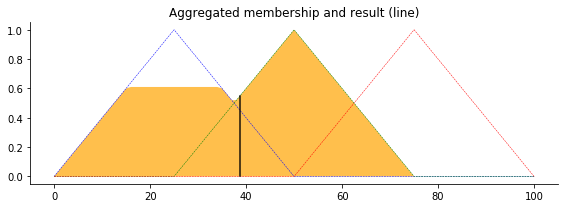

In [80]:
# Aggregate all three output membership functions together
aggregated = np.fmax(activation_lo, np.fmax(activation_md, activation_hi))

# Calculate defuzzified result
pct = fuzz.defuzz(x_pct, aggregated, 'centroid')
pct_activation = fuzz.interp_membership(x_pct, aggregated, pct)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_pct, pct_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_pct, pct_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_pct, pct_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_pct, pct0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([pct, pct], [0, pct_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [81]:
print("Risco indicado de: ", round(pct,2))

Risco indicado de:  38.69
